In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv('/content/placement.csv')

In [29]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In MLDLC we have to do the following steps:-
0. Preprocess + EDA + Feature Selection
1. Extract Input and Output cells
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model/Model selection
6. Deploy the model

****

**Step 0 - Preprocess + EDA + Feature Selection**
Since this data set has no null values, and no duplicates, So no need to remove any columns. But it has a column that is useless (Unnamed). So we have to remove it.

In [31]:
df = df.iloc[:,1:]  #This is a comand of numpy library which helps in removing the useless column (0th column) in the dataset

In [32]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [33]:
import matplotlib.pyplot as plt

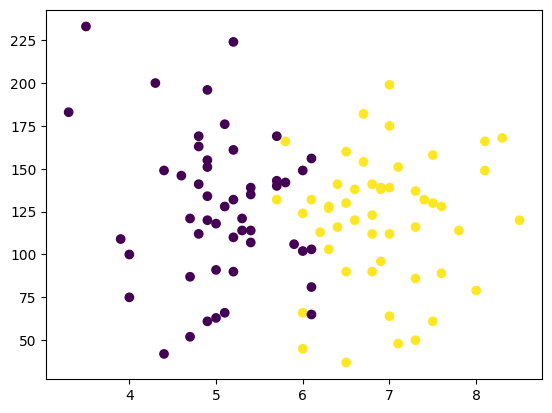

In [34]:
#EDA

plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

#It helps in finding the relationship between input and output using scatter plot and color codes.
#Here Yellow represents placed and Purple represents not placed

We are ignoring feature selection as we need all columns for now.

**Step 1 - Extract Input and output cells**

In [35]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [38]:
X #it is a 2D tensor

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [37]:
Y #it is a 1D tensor

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


Step 2 and Step 3 are switched for now

**Step 3 - Train Test split**



In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1)

In [41]:
X_train

,cgpa,iq
71,6.1,132.0
7,5.0,63.0
84,5.7,169.0
53,8.3,168.0
55,7.8,114.0
...,...,...
39,4.6,146.0
34,4.8,163.0
73,4.9,61.0
48,6.6,138.0


In [42]:
X_test

,cgpa,iq
56,6.1,65.0
4,5.8,142.0
5,7.1,48.0
58,8.0,79.0
85,5.8,166.0
63,6.3,128.0
61,7.3,137.0
69,8.5,120.0
0,6.8,123.0
98,6.3,103.0


In [43]:
Y_train

,placement
71,1
7,0
84,0
53,1
55,1
...,...
39,0
34,0
73,0
48,1


In [44]:
Y_test

,placement
56,0
4,0
5,1
58,1
85,1
63,1
61,1
69,1
0,1
98,1


**Step 2 - Scale the values**

In [46]:
from sklearn.preprocessing import StandardScaler

In [48]:
scalar = StandardScaler() #Creating a class object

In [52]:
X_train = scalar.fit_transform(X_train)
#fit_transform first understands the pattern then transforms the value from [-1, 1]

In [53]:
X_train

array([[ 1.76292745e-01,  1.75907315e-01],
       [-7.98734169e-01, -1.54981848e+00],
       [-1.78262496e-01,  1.10129651e+00],
       [ 2.12634657e+00,  1.07628599e+00],
       [ 1.68315252e+00, -2.74282023e-01],
       [ 1.41723609e+00,  8.26180804e-01],
       [-5.32817738e-01, -9.92083912e-02],
       [-1.06465060e+00, -9.49566030e-01],
       [ 1.94906895e+00,  6.01086135e-01],
       [ 5.30847986e-01, -8.74534474e-01],
       [ 9.74042038e-01,  1.85161207e+00],
       [ 1.06268085e+00,  6.51107172e-01],
       [ 7.96764417e-01, -3.24303060e-01],
       [ 1.76292745e-01,  7.76159766e-01],
       [-1.33056703e+00,  6.01086135e-01],
       [-4.44178927e-01,  2.50938872e-01],
       [ 1.76292745e-01, -1.09962914e+00],
       [ 8.85403228e-01,  3.25970428e-01],
       [-8.87372979e-01,  1.77658052e+00],
       [ 1.41723609e+00,  1.25886278e-01],
       [-1.41920584e+00,  1.87662259e+00],
       [-6.21456548e-01, -3.74324098e-01],
       [ 8.76539347e-02, -5.74408248e-01],
       [ 1.

In [54]:
X_test = scalar.transform(X_test)
#We did transform here because pattern is already identified, now we only need to transform it

In [55]:
X_test

array([[ 0.17629275, -1.49979744],
       [-0.08962369,  0.4260125 ],
       [ 1.06268085, -1.92497626],
       [ 1.86043014, -1.14965018],
       [-0.08962369,  1.02626495],
       [ 0.35357037,  0.07586524],
       [ 1.23995847,  0.30095991],
       [ 2.30362419, -0.12421891],
       [ 0.79676442, -0.04918735],
       [ 0.35357037, -0.54939773]])

**Step 4 - Train the model**

In [56]:
from sklearn.linear_model import LogisticRegression

In [60]:
clf = LogisticRegression() #Create a class object

In [62]:
#This is model training
clf.fit(X_train,Y_train)

#Here fit is used to train the model we only need to provide the training datasets

LogisticRegression()

**Step 5 - Model Evaluation**

In [63]:
Y_pred = clf.predict(X_test)
#predict is used to predict the values on the test dataset

In [65]:
Y_pred #These are the predicted values of the model on the test dataset

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(Y_test,Y_pred)

0.8

Here the accuracy is 80%

In [69]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

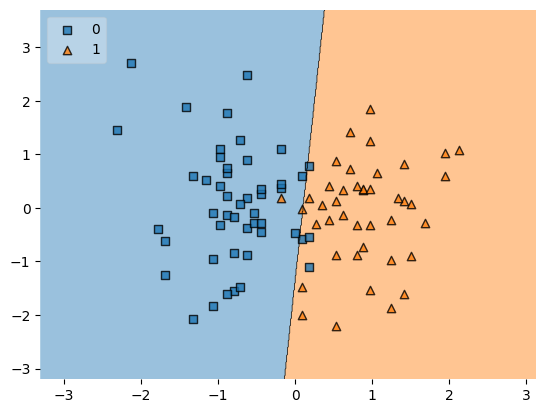

In [71]:
plot_decision_regions(X_train, Y_train.values, clf = clf, legend = 2)
#This creates a line on the basis of which model predicted the values for the test dataset

If we are not satisfied with the accuracy of the model we can change the values and train and test it again.
Since it is just a sample model, so we will not train test it again

In [72]:
import pickle

In [74]:
pickle.dump(clf, open('model.pkl','wb')) #This creates a binary file for our model which we can deploy and use in our websites or apps